In [12]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties

from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 

#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
#plt.rcParams["font.family"] = "serif"

In [13]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [14]:
colors = {}

              
colors['LO'] = 'b'#'#1f77b4' 
colors['NLO'] = 'g'#'
colors['NNLO']  = 'r'#'#1f77b4' 
colors['TMD'] =  '#9467bd'
colors['Pythia'] = 'blueviolet'
colors['Djangoh'] = '#8c564b'
colors['Rapgap'] = 'darkorange'
colors['Sherpa'] = 'crimson'
colors['Cascade'] = 'b'

#colors['LO'] ='#1f77b4'
#colors['NLO'] = '#ff7f0e'
#colors['NNLO']  ='#2ca02c'
#colors['TMD'] ='#d62728'
#colors['Pythia'] ='#9467bd'
#colors['Django'] = '#9467bd'
#colors['Rapgap'] = '
#colors['Sherpa'] = '#e377c2'
#'#7f7f7f',
#              '#bcbd22', '#17becf'


styles = {}
styles['NLO'] = 'dotted'#(0, (3, 1))
styles['LO'] = '-'
styles['NNLO'] = '-'
styles['Pythia'] = '-'
styles['Djangoh']  = 'dotted'
styles ['Rapgap'] = '-'
styles['Sherpa'] = '-'
styles['Cascade'] = '-'

<Figure size 1000x1000 with 0 Axes>

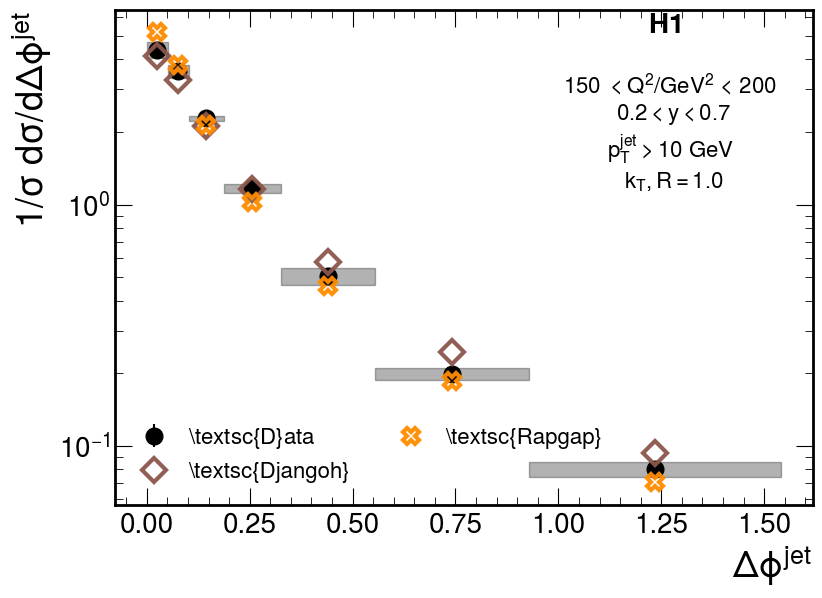

<Figure size 1000x1000 with 0 Axes>

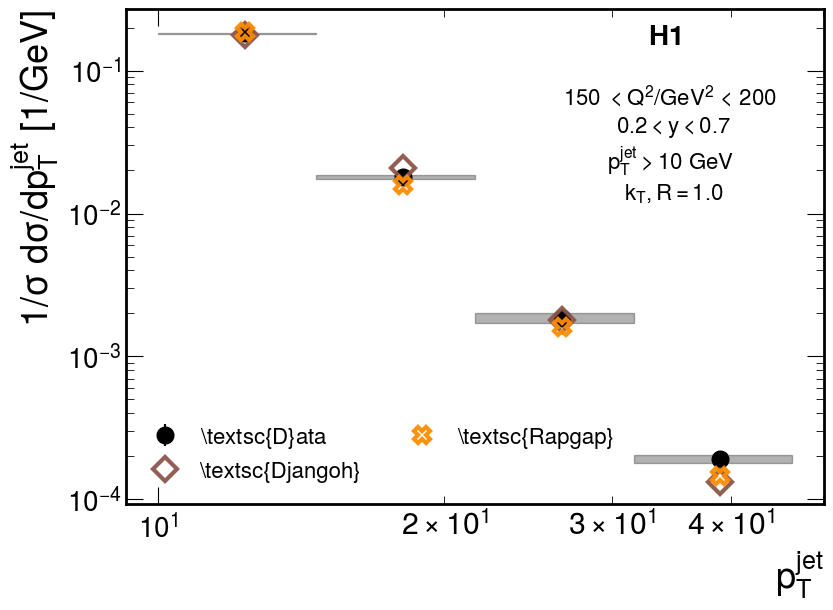

<Figure size 1000x1000 with 0 Axes>

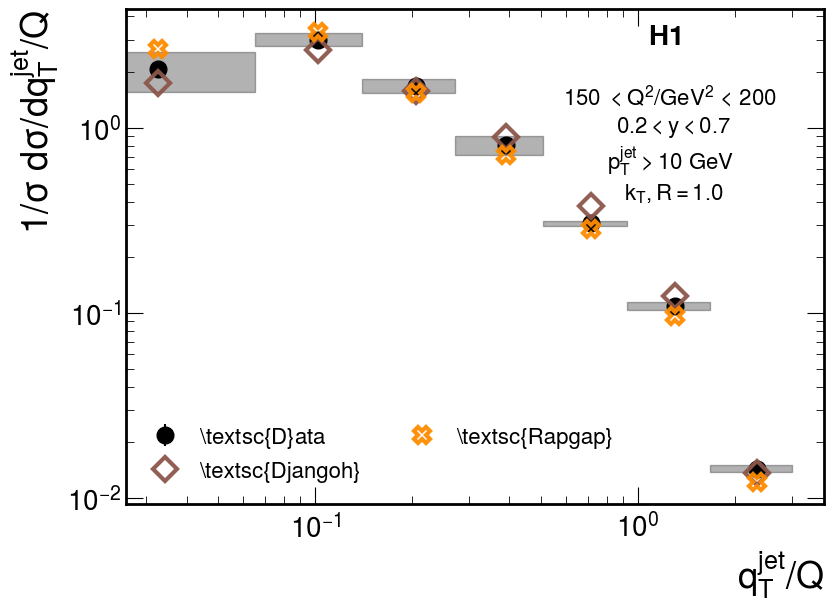

eta


<Figure size 1000x1000 with 0 Axes>

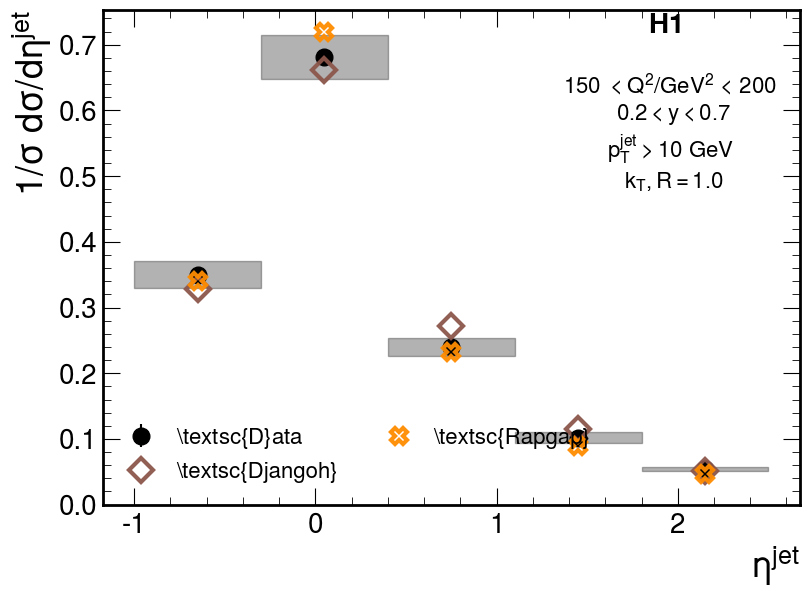

<Figure size 1000x1000 with 0 Axes>

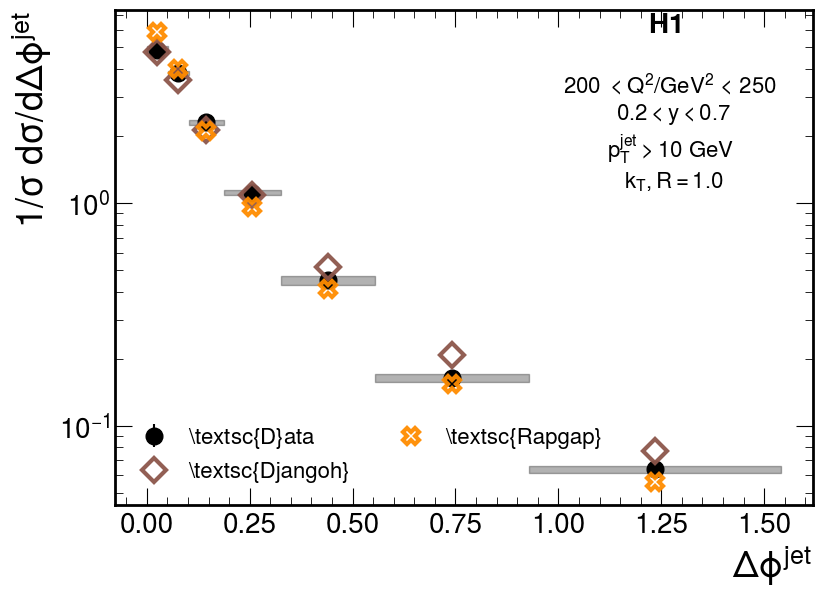

<Figure size 1000x1000 with 0 Axes>

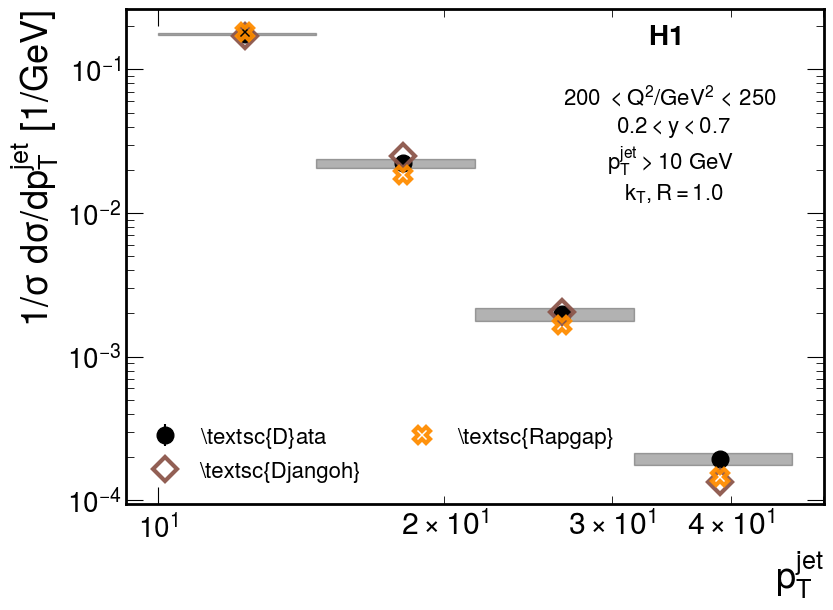

<Figure size 1000x1000 with 0 Axes>

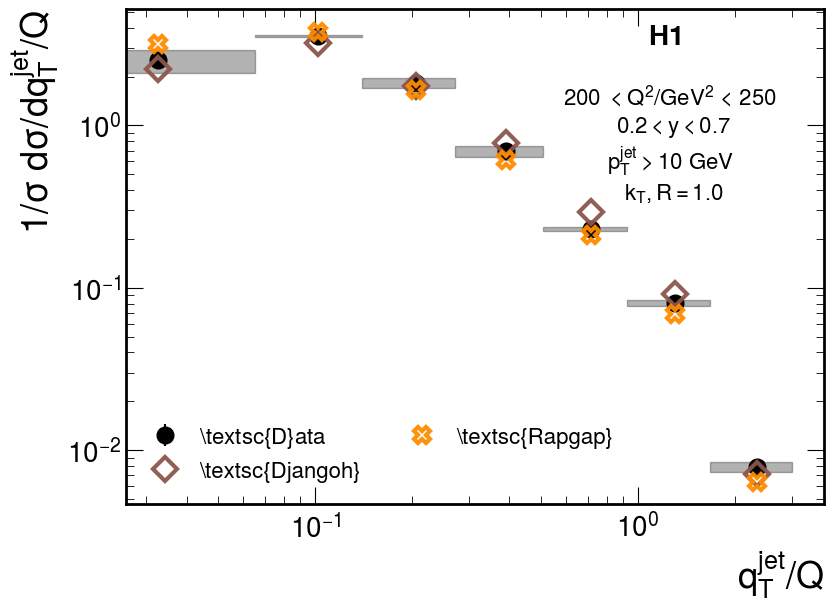

eta


<Figure size 1000x1000 with 0 Axes>

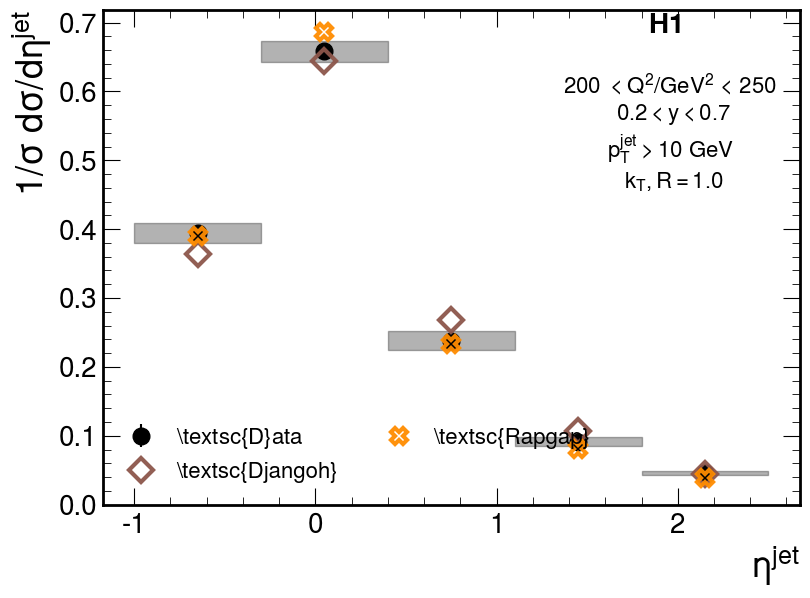

<Figure size 1000x1000 with 0 Axes>

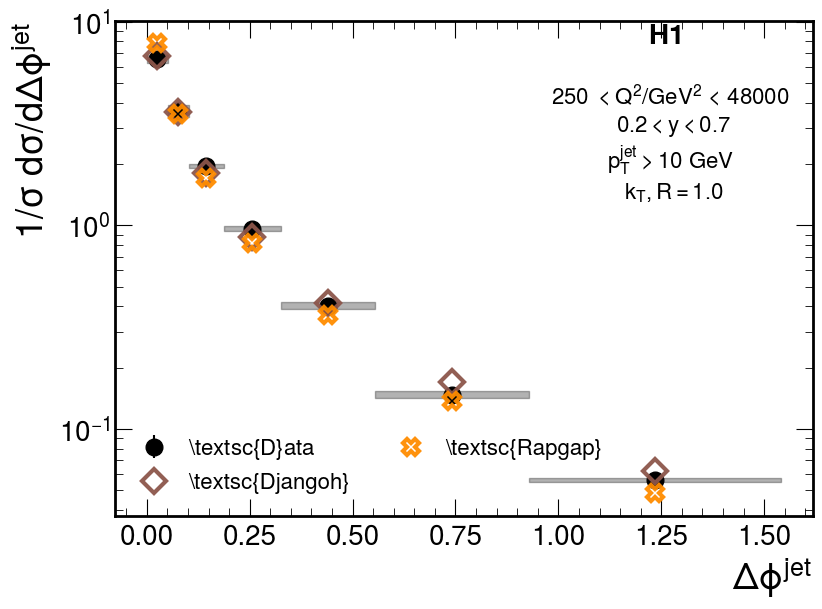

<Figure size 1000x1000 with 0 Axes>

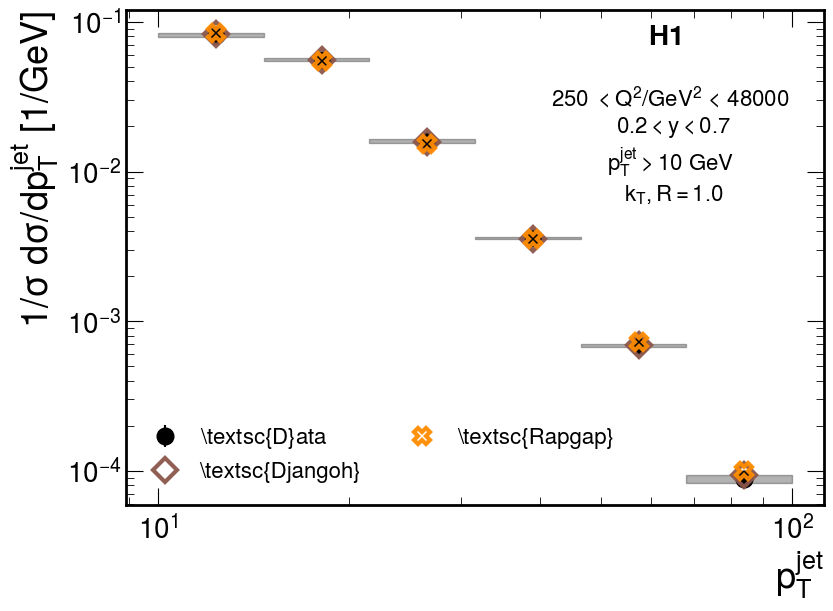

<Figure size 1000x1000 with 0 Axes>

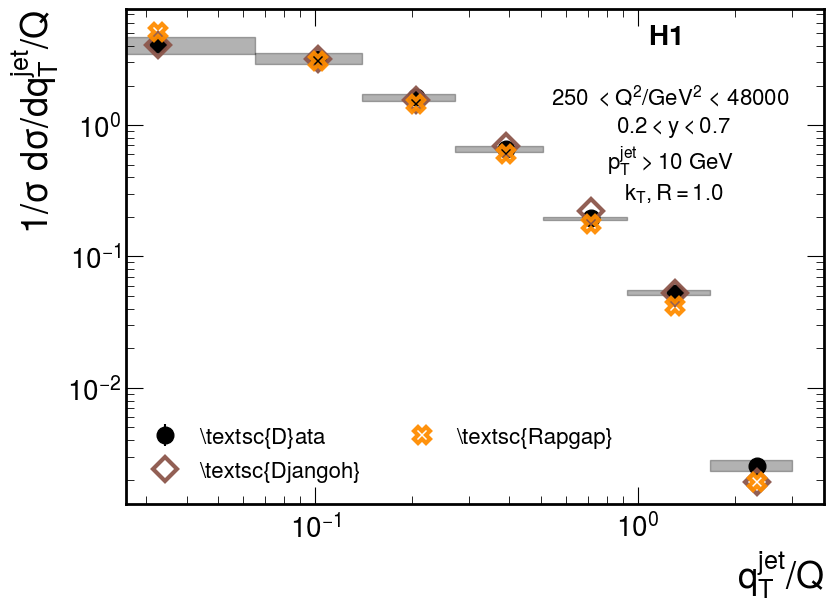

eta


<Figure size 1000x1000 with 0 Axes>

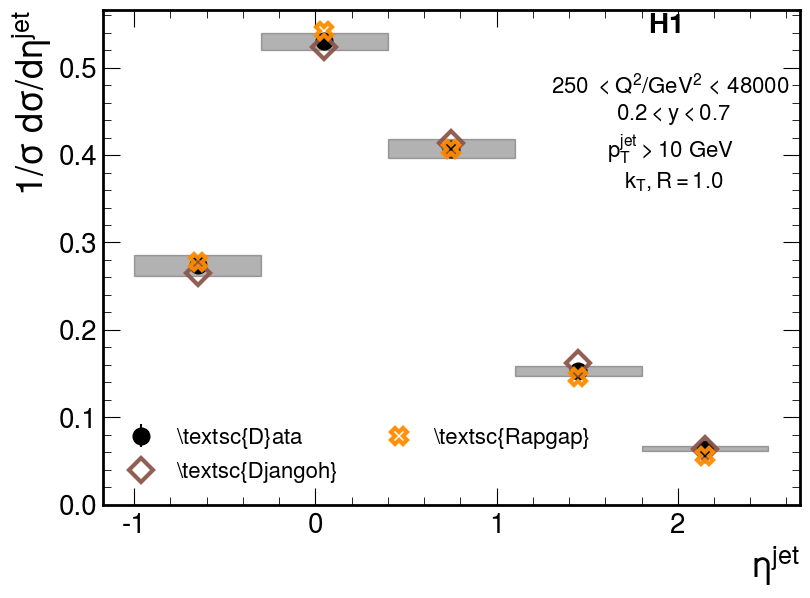

In [18]:
symbol = {}
symbol['dphi'] = '$\Delta\phi^\mathrm{jet}$ '
symbol['jeteta'] = '$\eta^\mathrm{jet}$'
symbol['qt']  = '$q_\mathrm{T}^\mathrm{jet}/Q$'
symbol['jetpt'] = '$p_\mathrm{T}^\mathrm{jet}$'

cuts = [150,200,250,48000]

for k in range(len(cuts)-1): 
    cut_label = str(cuts[k])+" < Q2 < "+str(cuts[k+1]) #+ " (GeV^2)"
    cut_label_latex = str(cuts[k])+" $< Q^{2}/GeV^{2}$ < "+str(cuts[k+1])
    
    for observable in ['dphi','jetpt','qt','jeteta']:

        #Hadronization corrections
        if observable == "pT" and cuts[k] != 250:
            continue

        with open('outputfiles/HadronizationCorrections.npy','rb') as f:
            hadcorr_pt = np.load(f)
            hadcorr_eta= np.load(f)
            hadcorr_qt = np.load(f)
            hadcorr_dphi = np.load(f)
        if 'jetpt' in observable:
            hadcorr = hadcorr_pt
        if 'qt' in observable:
            hadcorr = hadcorr_qt
        if 'eta' in observable:
            hadcorr = hadcorr_eta
        if 'dphi' in observable:
            hadcorr = hadcorr_dphi

        with open('outputfiles/HadronizationCorrections_H7.npy','rb') as f:
            hadcorr_pt = np.load(f)
            hadcorr_eta= np.load(f)
            hadcorr_qt = np.load(f)
            hadcorr_dphi = np.load(f)
        if 'jetpt' in observable:
            hadcorrH7 = hadcorr_pt
        if 'qt' in observable:
            hadcorrH7 = hadcorr_qt
        if 'eta' in observable:
            hadcorrH7 = hadcorr_eta
        if 'dphi' in observable:
            hadcorrH7 = hadcorr_dphi

        #QED corrections(why is it just Rapgap???)
        with open('outputfiles/QEDCorrections_Rapgap.npy' , 'rb') as f:
            qedcorr_pt = np.load(f)
            qedcorr_eta = np.load(f)
            qedcorr_qt = np.load(f)
            qedcorr_dphi = np.load(f)

        if 'jetpt' in observable:
            qedcorr = qedcorr_pt
        if 'qt' in observable:
            qedcorr = qedcorr_qt
        if 'eta' in observable:
            qedcorr = qedcorr_eta
        if 'dphi' in observable:
            qedcorr = qedcorr_dphi


        #Django and Rapgap predictions
        if observable == "jetpt" and cuts[k] in [150, 200]:
            Rapgap = np.load("outputfiles/MCCrossSection_"+observable+"_Rapgap_nominal_ep0607_data_nominal_"+cut_label+".npy")[0:4]
            Django = np.load("outputfiles/MCCrossSection_"+observable+"_Django_nominal_ep0607_data_nominal_"+cut_label+".npy")[0:4]
        else:
            Rapgap = np.load("outputfiles/MCCrossSection_"+observable+"_Rapgap_nominal_ep0607_data_nominal_"+cut_label+".npy")
            Django = np.load("outputfiles/MCCrossSection_"+observable+"_Django_nominal_ep0607_data_nominal_"+cut_label+".npy")
        with open('outputfiles/Rivet_%s.npy'%(observable),'rb') as f:
            Pythia = np.load(f)

        #Systematic uncertainties

        #with open('outputfiles/ResultwithSystematicUncertainties_%s.npy'%(observable), 'rb') as f:
        with open('outputfiles/ResultwithSystematicUncertainties_%s_ensemble_FIXED_%s.npy'%(observable,cut_label), 'rb') as f:
            x = np.load(f)
            y = np.load(f)
            xerr = np.load(f)
            yerr = np.load(f)
            stat_error = np.load(f)
            yerr_qed = np.load(f)
            yerr_0 = np.load(f)
            yerr_1 = np.load(f)
            yerr_5 = np.load(f)
            yerr_7 = np.load(f)
            yerr_11 = np.load(f)
            yerr_model = np.load(f)

        #apply QED corrections
        #turned off QED correction to the uncertainty
        #y = np.multiply(y, qedcorr)
        
      

        #Statistical uncertainites

        '''
        stat_error = np.zeros(len(y))

        if 'pt' in observable:
            stat_error = np.array([ 0.80,0.69,1.73,2.97,4.72, 9.75])

        elif 'eta' in observable:
            stat_error = np.array([ 1.9,0.56,1.05, 1.93, 3.42])

        elif 'dphi' in observable:
            stat_error = np.array([1.44, 0.96,1.34, 1.66, 1.66, 1.99,2.73])
        elif 'qt' in observable:
            stat_error = np.array([1.99,1.26,1.61,1.48,1.77,2.84,5.36])

        stat_error = np.divide(stat_error,100.0)
        '''
        total_error = np.sqrt(np.multiply(stat_error,stat_error)+ np.multiply(yerr,yerr))



        ##################
        #First, data only.
        ##################

        fig = plt.figure(figsize=(9, 9))
        gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
        gs.update(wspace=0.025, hspace=0.1) 
        ax0 = plt.subplot(gs[0])
        ax0.yaxis.set_ticks_position('both')
        ax0.xaxis.set_ticks_position('both')
        ax0.tick_params(direction="in",which="both")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax0.minorticks_on()

        dataline = plt.errorbar(x, y,yerr=y*stat_error,fmt='o',color='k',ms=12)
        
        djangohline = plt.errorbar(x, Django,xerr=xerr,ms=12,lw=0,label='Djangoh', 
                       alpha=0.95,color=colors['Djangoh'],marker='D',markerfacecolor='none',markeredgewidth=3)
        djangohline[-1][0].set_linestyle(styles['Djangoh']) 

        rapgapline = plt.errorbar(x, Rapgap,xerr=xerr,ms=12,lw=0,label='Rapgap', 
                       alpha=0.95,color=colors['Rapgap'],marker='X',markerfacecolor='none',markeredgewidth=3)
        rapgapline[-1][0].set_linestyle(styles['Rapgap']) 
        
        plt.ylabel(r'$1/\sigma_\mathrm{jet}$ $\mathrm{d}\sigma/\mathrm{d}$%s'%symbol[observable])
        if 'jetpt' in observable:
             plt.ylabel(r'$1/\sigma_\mathrm{jet}$ $\mathrm{d}\sigma/\mathrm{d}$%s [1/GeV]'%symbol[observable])
        if 'pt' in observable:
            plt.xlabel(symbol[observable]+' $\mathrm{[GeV]}$')
        if 'dphi' in observable:
            plt.xlabel(symbol[observable]+' $\mathrm{[rad]}$')
        if 'eta' in observable or 'qt' in observable:
            plt.xlabel(symbol[observable])
            
        plt.ylabel(r'$1/\sigma$ $\mathrm{d}\sigma/\mathrm{d}$%s'%symbol[observable])
        if 'jetpt' in observable:
             plt.ylabel(r'$1/\sigma$ $\mathrm{d}\sigma/\mathrm{d}$%s [1/GeV]'%symbol[observable])
        plt.xlabel(symbol[observable])

        xposition = 0.2
        if 'jetpt' in observable:
            xposition = 0.8
        if 'qt' in observable:
            xposition = 0.8
        if 'eta' in observable:
            xposition = 0.8
        if 'dphi' in observable:
            xposition  = 0.8

        plt.text(xposition, 0.92,'H1 ',
                      horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes, fontsize=20, fontweight='bold')

        plt.text(xposition, 0.72,cut_label_latex+' \n $0.2<y<0.7$ \n $p_\mathrm{T}^\mathrm{jet}>10$ GeV  \n $k_\mathrm{T}, R=1.0$',
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes, fontsize=16)
        #plt.legend(loc='best',fontsize=18)
        
        handles, labels = ax0.get_legend_handles_labels()
    
        ax0.legend(handles=[dataline,djangohline,rapgapline],
                     labels=[r'\textsc{D}$\mathrm{ata}$',r'\textsc{Djangoh}',r'\textsc{Rapgap}'],
               loc='lower left',fontsize=16,ncol=2)


        #plt.title('H1 Preliminary')
        if 'dphi' in observable:
            plt.yscale('log')
        if 'eta' in observable:
            print ('eta')

        if 'jetpt' in observable:
            plt.xscale('log')
            plt.yscale('log')

        if 'qt' in observable:
            plt.xscale('log')
            plt.yscale('log')


        for i in range(len(x)):
            x1 = x[i] - xerr[i]
            x2 = x[i] + xerr[i]
            r  = np.array([x1,x2])
            y1 = y[i]*(1.0+yerr[i])
            y2 = y[i]*(1.0-yerr[i])
            plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')


        if 'eta' in observable:
            plt.ylim(bottom=0.0)

        plt.show()
        plt.tight_layout()

        fig.savefig('figures/FinalResult_JustData_%s_%s.png'%(observable,cut_label))

        ##################
        #end data only
        ##################